Need to be able to predict the quality of wine from a set of data related to red and white variants of the Portuguese "Vinho Verde" wine. Data has already been cleaned but may need to be transformed. 

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
winequality ='winequality.csv'
df = pd.read_csv(winequality)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.shape

(6497, 13)

In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<AxesSubplot:ylabel='Frequency'>

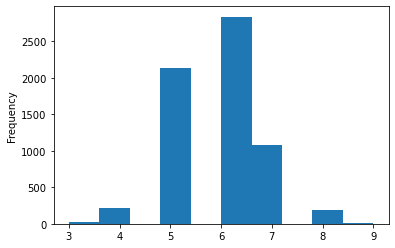

In [6]:
# Making histogram of quality to see distribution.
df["quality"].plot.hist()

In [7]:
# statistical summary of quality 
df["quality"].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [8]:
df["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [9]:
df["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

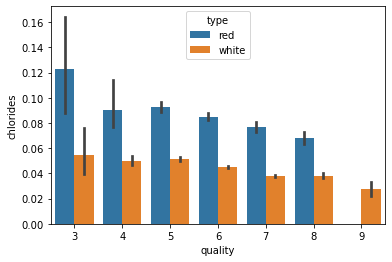

In [10]:
#boxplots quality vs target
sns.barplot(y='chlorides', x='quality', data=df, hue='type')

# as chlorides go down, quality goes up

<AxesSubplot:xlabel='quality', ylabel='density'>

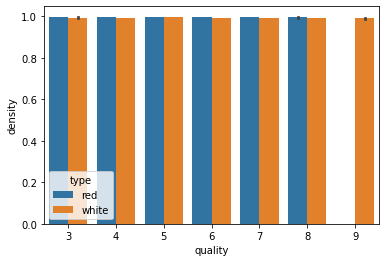

In [11]:
sns.barplot(y='density', x='quality', data=df, hue='type')
# density appears to be the same across all wine qualities

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

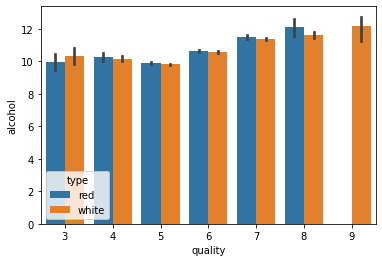

In [12]:
sns.barplot(y='alcohol', x='quality', data=df, hue='type')
# other than being high, alcohol content doesn't appear to have as much of an affect on quality as one might think

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

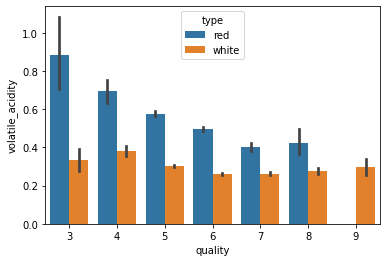

In [13]:
sns.barplot(y='volatile_acidity', x='quality', data=df, hue='type')
# lower volatile_acidity seems to equate with higher quality

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

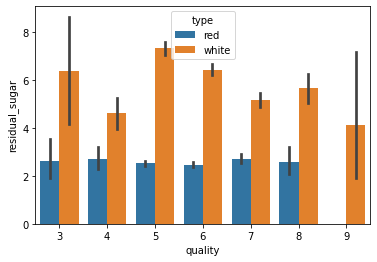

In [14]:
sns.barplot(y='residual_sugar', x='quality', data=df, hue='type')
# sugars appear to be the same across red quality but differ signifacantly among whites, with less sugar in reds

<AxesSubplot:xlabel='quality', ylabel='total_sulfur_dioxide'>

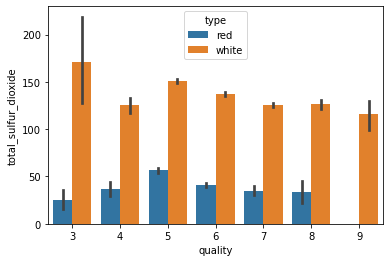

In [15]:
sns.barplot(y='total_sulfur_dioxide', x='quality', data=df, hue='type')
# total_sulfur_dioxide appears to be low in reds compared to whites

In [16]:
#create 2 datasets and model them separately: red, white
red_wine = df.loc[df['type']  == 'red']
white_wine = df.loc[df['type']  == 'white']

In [17]:
#drop type and quality columns
red_wine = red_wine.drop(red_wine[['type']], axis = 1)
white_wine = white_wine.drop(white_wine[['type']], axis = 1)

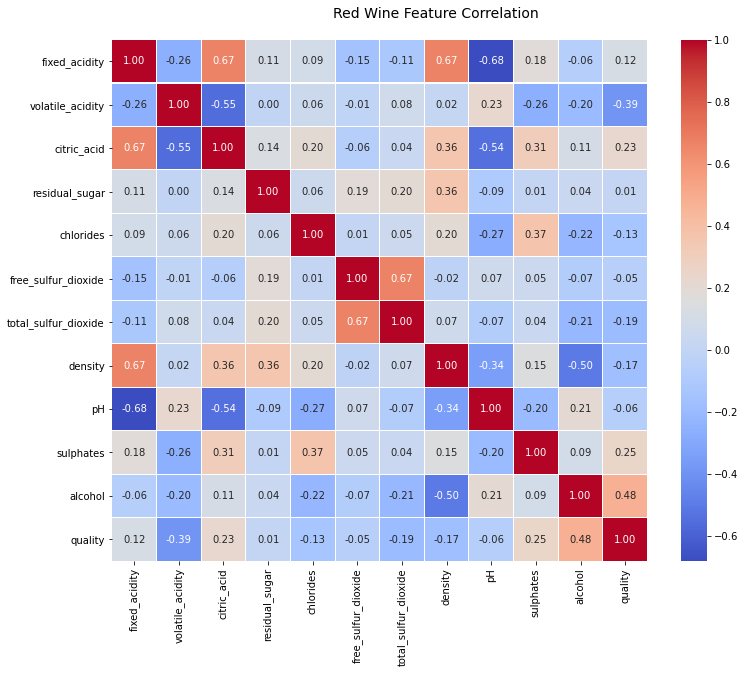

In [18]:
#Create a correlation heatmap for looking at the correlation of all features
red_corrmat = red_wine.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(red_corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Red Wine Feature Correlation', fontsize=14)
# Reds appear to have correlations between:
# fixed acidity and pH
# fixed acidity and density
# fixed acidity and citric acid
# free sulfur dioxides and total sulfur dioxides

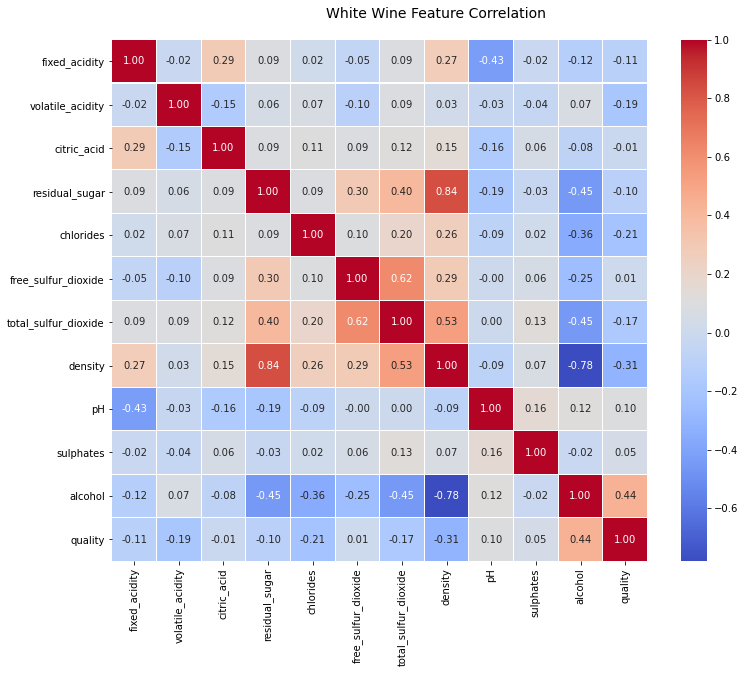

In [19]:
white_corrmat = white_wine.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(white_corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('White Wine Feature Correlation', fontsize=14)
# whites have correlations between:
# residual sugar and density
# alcohol and density

In [20]:
#save to csv for next step
red_wine.to_csv(r'Capstone2_EDA_red.csv')
white_wine.to_csv(r'Capstone2_EDA_white.csv')